### API

API types : restful api , graphql api , soap api.

We will work with binance api.
* To use it you have first to create an account in : https://accounts.binance.me/en/register?ref=28611953

* For details about this api , to become familiar with check : https://accounts.binance.me/en/register?ref=28611953

* create your api : https://www.binance.me/en/my/settings/api-management
* save api key and secret key after api creation.

In [50]:
import requests

In [51]:
public_key=""
secret_key=""

The base endpoint/url is: https://testnet.binancefuture.com.

#### Market data endpoints

##### 1. Test Connectivity

In [52]:
base_url='https://testnet.binancefuture.com'
endpoint='/fapi/v1/ping'

In [53]:
r=requests.get(base_url+endpoint)

In [54]:
r.status_code

200

In [55]:
r.text

'{}'

In [56]:
r_json=r.json()
r_json

{}

##### 2. Check Server time

Get the current server time.

In [57]:
endpoint='/fapi/v1/time'
r=requests.get(base_url+endpoint)

In [58]:
s=r.json()
s
#timestamp,number of seconds since 1970-01-01

{'serverTime': 1674747153938}

In [59]:
t=list(s.values())[0]
#ms

In [60]:
t/=1000

In [61]:
from datetime import datetime
# convert the timestamp to a datetime object in the local timezone
dt = datetime.fromtimestamp(t)
dt

datetime.datetime(2023, 1, 26, 16, 32, 33, 938000)

##### 3. Exchange Information

Current exchange trading rules and symbol information.

In [62]:
endpoint='/fapi/v1/exchangeInfo'
r=requests.get(base_url+endpoint)

In [63]:
r_json=r.json()
r_json

{'timezone': 'UTC',
 'serverTime': 1674747139985,
 'futuresType': 'U_MARGINED',
 'rateLimits': [{'rateLimitType': 'REQUEST_WEIGHT',
   'interval': 'MINUTE',
   'intervalNum': 1,
   'limit': 6000},
  {'rateLimitType': 'ORDERS',
   'interval': 'MINUTE',
   'intervalNum': 1,
   'limit': 1200},
  {'rateLimitType': 'ORDERS',
   'interval': 'SECOND',
   'intervalNum': 10,
   'limit': 300}],
 'exchangeFilters': [],
 'assets': [{'asset': 'USDT',
   'marginAvailable': True,
   'autoAssetExchange': '-100'},
  {'asset': 'BTC',
   'marginAvailable': True,
   'autoAssetExchange': '-0.00100000'},
  {'asset': 'BNB',
   'marginAvailable': True,
   'autoAssetExchange': '-0.00100000'},
  {'asset': 'ETH',
   'marginAvailable': True,
   'autoAssetExchange': '-0.00100000'},
  {'asset': 'FIL', 'marginAvailable': True, 'autoAssetExchange': '-200'},
  {'asset': 'BUSD', 'marginAvailable': True, 'autoAssetExchange': '-200'},
  {'asset': 'USDC', 'marginAvailable': True, 'autoAssetExchange': '-84'}],
 'symbols': 

In [64]:
r_json['rateLimits']

[{'rateLimitType': 'REQUEST_WEIGHT',
  'interval': 'MINUTE',
  'intervalNum': 1,
  'limit': 6000},
 {'rateLimitType': 'ORDERS',
  'interval': 'MINUTE',
  'intervalNum': 1,
  'limit': 1200},
 {'rateLimitType': 'ORDERS',
  'interval': 'SECOND',
  'intervalNum': 10,
  'limit': 300}]

In [65]:
r_json['symbols']

[{'symbol': 'BTCUSDT',
  'pair': 'BTCUSDT',
  'contractType': 'PERPETUAL',
  'deliveryDate': 4133404802000,
  'onboardDate': 1569398400000,
  'status': 'TRADING',
  'maintMarginPercent': '2.5000',
  'requiredMarginPercent': '5.0000',
  'baseAsset': 'BTC',
  'quoteAsset': 'USDT',
  'marginAsset': 'USDT',
  'pricePrecision': 2,
  'quantityPrecision': 3,
  'baseAssetPrecision': 8,
  'quotePrecision': 8,
  'underlyingType': 'COIN',
  'underlyingSubType': [],
  'settlePlan': 0,
  'triggerProtect': '0.0500',
  'liquidationFee': '0.020000',
  'marketTakeBound': '0.30',
  'filters': [{'minPrice': '231',
    'maxPrice': '716224',
    'filterType': 'PRICE_FILTER',
    'tickSize': '0.10'},
   {'stepSize': '0.001',
    'filterType': 'LOT_SIZE',
    'maxQty': '1000',
    'minQty': '0.001'},
   {'stepSize': '0.001',
    'filterType': 'MARKET_LOT_SIZE',
    'maxQty': '1000',
    'minQty': '0.001'},
   {'limit': 200, 'filterType': 'MAX_NUM_ORDERS'},
   {'limit': 10, 'filterType': 'MAX_NUM_ALGO_ORDERS'

##### 4. Order Book

In [66]:
endpoint='/fapi/v1/depth'
payload={"symbol":"BTCUSDT","limit":100}

In [67]:
r=requests.get(base_url+endpoint,params=payload)

In [68]:
r_json=r.json()
r_json

{'lastUpdateId': 29575918006,
 'E': 1674747158744,
 'T': 1674747158743,
 'bids': [['23111.30', '21.432'],
  ['23111.10', '43.930'],
  ['23108.80', '0.223'],
  ['23107.50', '0.002'],
  ['23104.20', '124.328'],
  ['23104.10', '13.376'],
  ['23103.40', '39.906'],
  ['23102.30', '22.738'],
  ['23100.00', '1.139'],
  ['23093.10', '0.102'],
  ['23063.20', '0.088'],
  ['23000.00', '4.856'],
  ['22950.00', '2.178'],
  ['22900.00', '275.180'],
  ['22885.40', '0.004'],
  ['22882.20', '4.000'],
  ['22866.10', '0.005'],
  ['22850.00', '2.406'],
  ['22845.30', '5.428'],
  ['22844.00', '0.010'],
  ['22830.10', '0.436'],
  ['22822.20', '0.001'],
  ['22816.20', '12.193'],
  ['22800.00', '41.343'],
  ['22774.10', '0.003'],
  ['22774.00', '0.001'],
  ['22772.20', '2.000'],
  ['22764.40', '0.002'],
  ['22761.00', '0.104'],
  ['22752.00', '1.287'],
  ['22750.00', '2.621'],
  ['22748.40', '10.372'],
  ['22745.00', '0.007'],
  ['22740.00', '0.004'],
  ['22730.00', '2.694'],
  ['22726.50', '0.004'],
  ['2272

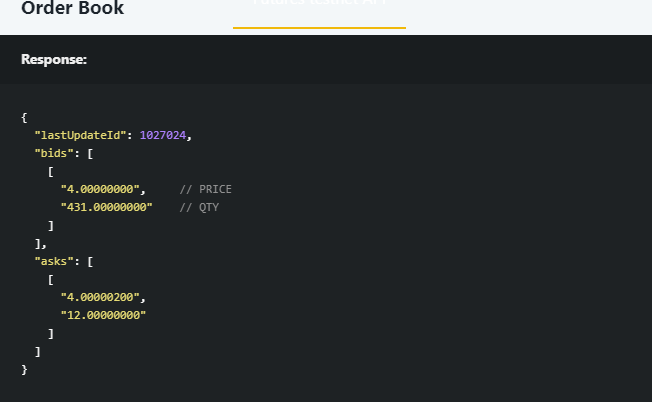

In [69]:
from IPython.display import Image
Image(filename='orderbook.png')

In [70]:
#people that want to sell
s=r_json["asks"]
s
#[price,quantity]

[['23114.10', '62.429'],
 ['23116.10', '6.994'],
 ['23116.50', '0.002'],
 ['23118.40', '10.483'],
 ['23119.20', '11.250'],
 ['23121.50', '2.944'],
 ['23131.30', '75.973'],
 ['23131.40', '25.248'],
 ['23132.50', '0.002'],
 ['23133.70', '99.736'],
 ['23135.30', '2.264'],
 ['23137.20', '0.001'],
 ['23137.60', '28.862'],
 ['23140.20', '9.716'],
 ['23140.50', '0.002'],
 ['23142.50', '46.887'],
 ['23148.50', '0.002'],
 ['23150.00', '0.910'],
 ['23155.70', '0.088'],
 ['23156.50', '0.002'],
 ['23164.50', '0.002'],
 ['23172.50', '0.002'],
 ['23175.90', '0.051'],
 ['23176.00', '0.064'],
 ['23176.50', '0.039'],
 ['23177.10', '0.053'],
 ['23177.40', '0.059'],
 ['23177.70', '0.030'],
 ['23178.30', '0.054'],
 ['23178.60', '0.066'],
 ['23178.90', '0.047'],
 ['23179.50', '0.037'],
 ['23179.80', '0.060'],
 ['23180.10', '0.037'],
 ['23180.50', '0.002'],
 ['23181.00', '0.080'],
 ['23184.10', '0.004'],
 ['23190.00', '2.156'],
 ['23195.50', '0.002'],
 ['23200.00', '0.005'],
 ['23203.50', '0.002'],
 ['23211

In [71]:
#people that want to buy
s=r_json["bids"]
s

[['23111.30', '21.432'],
 ['23111.10', '43.930'],
 ['23108.80', '0.223'],
 ['23107.50', '0.002'],
 ['23104.20', '124.328'],
 ['23104.10', '13.376'],
 ['23103.40', '39.906'],
 ['23102.30', '22.738'],
 ['23100.00', '1.139'],
 ['23093.10', '0.102'],
 ['23063.20', '0.088'],
 ['23000.00', '4.856'],
 ['22950.00', '2.178'],
 ['22900.00', '275.180'],
 ['22885.40', '0.004'],
 ['22882.20', '4.000'],
 ['22866.10', '0.005'],
 ['22850.00', '2.406'],
 ['22845.30', '5.428'],
 ['22844.00', '0.010'],
 ['22830.10', '0.436'],
 ['22822.20', '0.001'],
 ['22816.20', '12.193'],
 ['22800.00', '41.343'],
 ['22774.10', '0.003'],
 ['22774.00', '0.001'],
 ['22772.20', '2.000'],
 ['22764.40', '0.002'],
 ['22761.00', '0.104'],
 ['22752.00', '1.287'],
 ['22750.00', '2.621'],
 ['22748.40', '10.372'],
 ['22745.00', '0.007'],
 ['22740.00', '0.004'],
 ['22730.00', '2.694'],
 ['22726.50', '0.004'],
 ['22724.00', '6.600'],
 ['22711.00', '0.108'],
 ['22705.00', '2.202'],
 ['22700.00', '22.488'],
 ['22697.40', '0.002'],
 ['

#### 5. Recent Trades List

In [72]:
endpoint='/fapi/v1/trades'
payload={"symbol":"BTCUSDT","limit":500}

In [73]:
r=requests.get(base_url+endpoint,params=payload)

In [74]:
r_json=r.json()
r_json

[{'id': 248897453,
  'price': '23148.50',
  'qty': '0.002',
  'quoteQty': '46.29',
  'time': 1674746513369,
  'isBuyerMaker': False},
 {'id': 248897454,
  'price': '23156.50',
  'qty': '0.002',
  'quoteQty': '46.31',
  'time': 1674746513369,
  'isBuyerMaker': False},
 {'id': 248897455,
  'price': '23164.50',
  'qty': '0.002',
  'quoteQty': '46.32',
  'time': 1674746513370,
  'isBuyerMaker': False},
 {'id': 248897456,
  'price': '23170.50',
  'qty': '0.021',
  'quoteQty': '486.58',
  'time': 1674746513370,
  'isBuyerMaker': False},
 {'id': 248897457,
  'price': '23172.50',
  'qty': '0.002',
  'quoteQty': '46.34',
  'time': 1674746513370,
  'isBuyerMaker': False},
 {'id': 248897458,
  'price': '23173.70',
  'qty': '0.143',
  'quoteQty': '3313.83',
  'time': 1674746513370,
  'isBuyerMaker': False},
 {'id': 248897459,
  'price': '23144.70',
  'qty': '0.010',
  'quoteQty': '231.44',
  'time': 1674746514033,
  'isBuyerMaker': True},
 {'id': 248897460,
  'price': '23146.60',
  'qty': '5.394',

##### 6. New Order (TRADE)

Now with post requests .
* Send in a new order.

In [75]:
endpoint='/fapi/v1/order'
timestamp=int((datetime.now().timestamp())*1000)
#we want to sell so we set side value to SELL.
payload={"symbol":"ETHUSDT","side":"SELL","type":"LIMIT","timeInForce":"GTC","quantity":0.2,"price":322.42,"timestamp":timestamp}

In [76]:
from urllib.parse import urlencode
query_string=urlencode(payload)
print(query_string)

symbol=ETHUSDT&side=SELL&type=LIMIT&timeInForce=GTC&quantity=0.2&price=322.42&timestamp=1674747160485


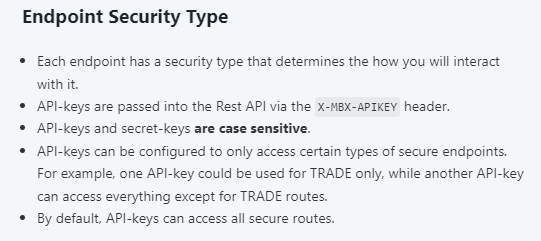

In [77]:
Image(filename='endpointSecurityType.png')

In [78]:
import hmac
import hashlib 
payload['signature']=hmac.new(
    secret_key.encode("utf-8"),query_string.encode("utf-8"),hashlib.sha256).hexdigest()

In [79]:
payload['signature']

'9745960c912ce8474dbfe840da74f165167f6e7eec56788cafafb251bf725d18'

In [80]:
headers={"X-MBX-APIKEY":public_key}

In [83]:
r=requests.post(base_url+endpoint,headers=headers,params=payload)

In [ ]:
r.json()

##### 7. Cancel Order (TRADE)

* Delete request : DELETE /fapi/v1/order

In [88]:
endpoint='/fapi/v1/order'
#define your payload
payload={}

In [89]:
r=requests.delete(base_url+endpoint,headers=headers,params=payload)

In [ ]:
r.json()


        
        Fin